In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import pylab
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from pylab import rcParams
import statsmodels.api as sm
import statistics
from scipy import stats
import sklearn
from sklearn import preprocessing
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
import seaborn as sb
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

import warnings

warnings.filterwarnings('ignore')
df = pd.read_csv("churn_clean.csv")
df.dropna()
print(df.shape)
print(list(df.columns))
df.head()

(10000, 50)
['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']


,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [3]:
#check for missing data
df.isna().any()

CaseOrder               False
Customer_id             False
Interaction             False
UID                     False
City                    False
State                   False
County                  False
Zip                     False
Lat                     False
Lng                     False
Population              False
Area                    False
TimeZone                False
Job                     False
Children                False
Age                     False
Income                  False
Marital                 False
Gender                  False
Churn                   False
Outage_sec_perweek      False
Email                   False
Contacts                False
Yearly_equip_failure    False
Techie                  False
Contract                False
Port_modem              False
Tablet                  False
InternetService         False
Phone                   False
Multiple                False
OnlineSecurity          False
OnlineBackup            False
DeviceProt

In [4]:
df.fillna(df.mean(), inplace=True)

In [5]:
df.isna()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.nunique()

CaseOrder               10000
Customer_id             10000
Interaction             10000
UID                     10000
City                     6058
State                      52
County                   1620
Zip                      8583
Lat                      8563
Lng                      8630
Population               5933
Area                        3
TimeZone                   25
Job                       639
Children                   11
Age                        72
Income                   9993
Marital                     5
Gender                      3
Churn                       2
Outage_sec_perweek       9986
Email                      23
Contacts                    8
Yearly_equip_failure        6
Techie                      2
Contract                    3
Port_modem                  2
Tablet                      2
InternetService             3
Phone                       2
Multiple                    2
OnlineSecurity              2
OnlineBackup                2
DeviceProt

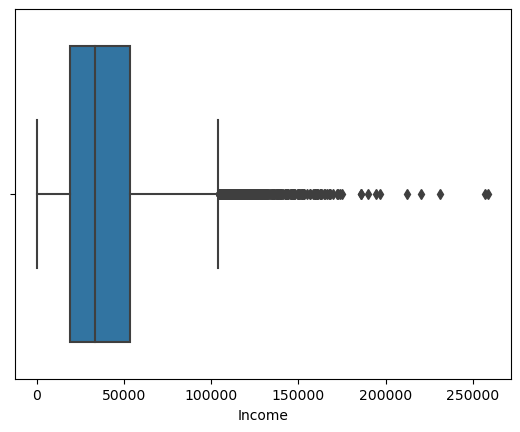

In [7]:
# dictating outliers
boxplot=sns.boxplot(x='Income',data=df)

In [8]:
# Dropping outliers systematically
outlierFilter=df['Income'] < 65000
df = df[outlierFilter]

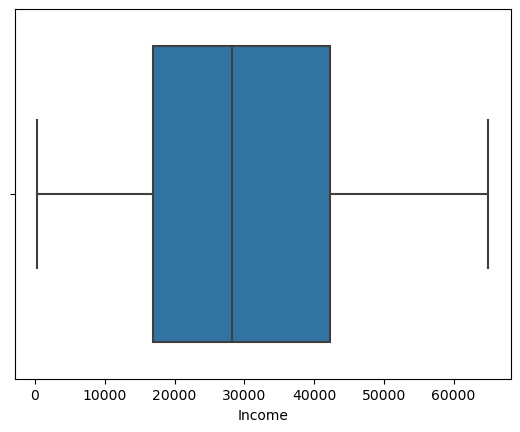

In [9]:
boxplot=sns.boxplot(x='Income',data=df)

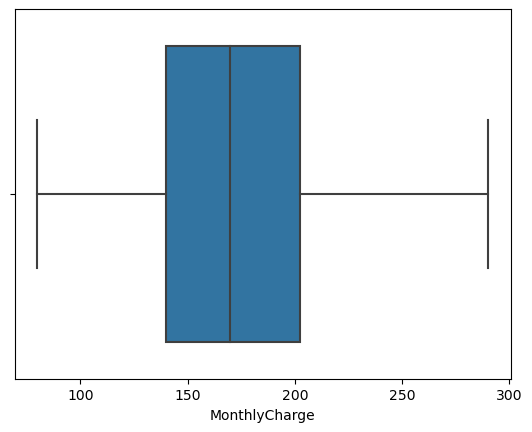

In [10]:
boxplot=sns.boxplot(x='MonthlyCharge',data=df)

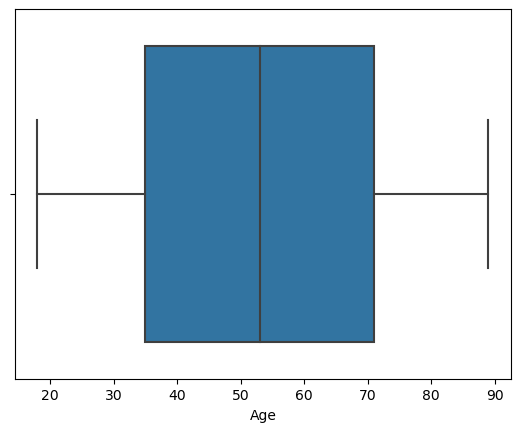

In [11]:
boxplot=sns.boxplot(x='Age',data=df)

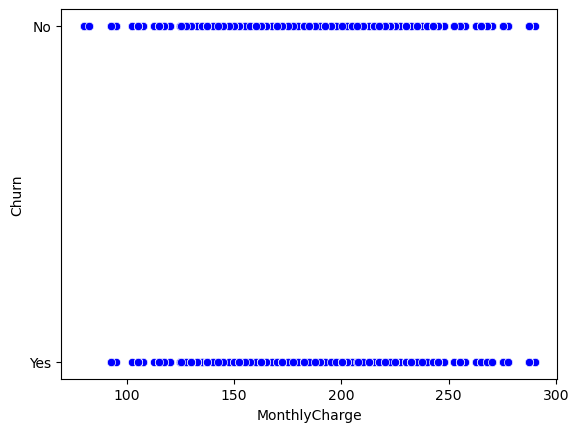

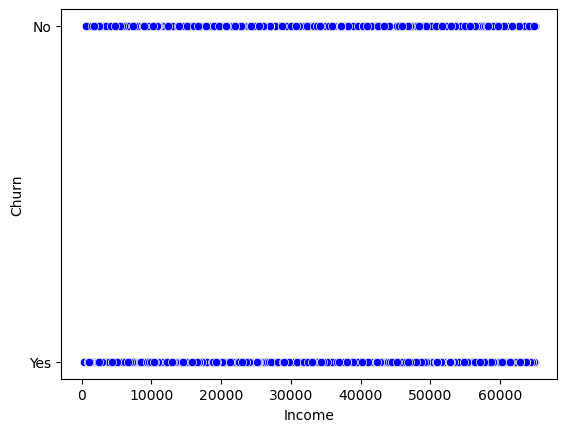

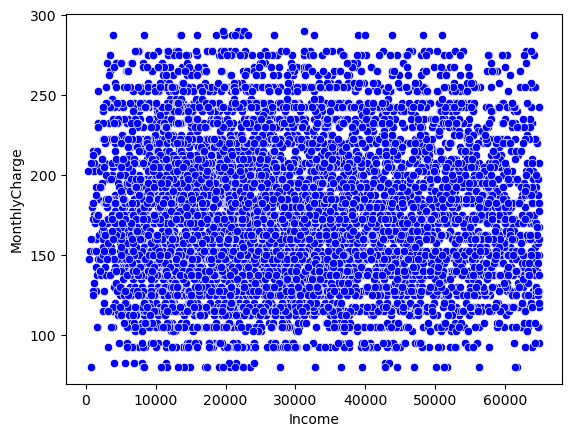

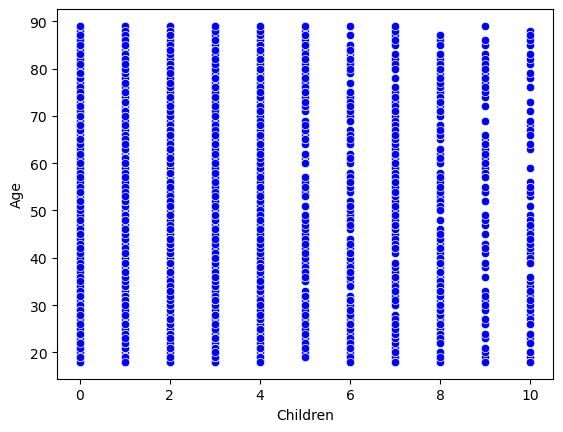

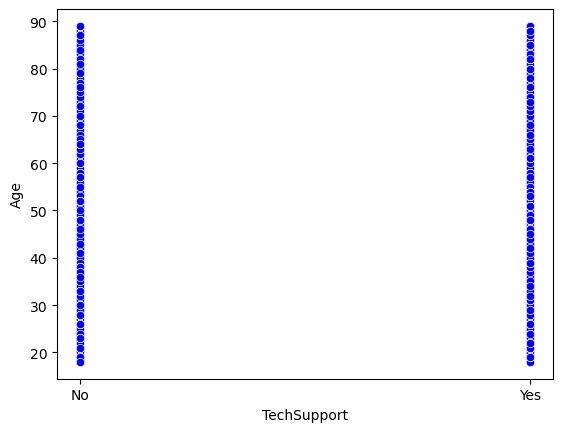

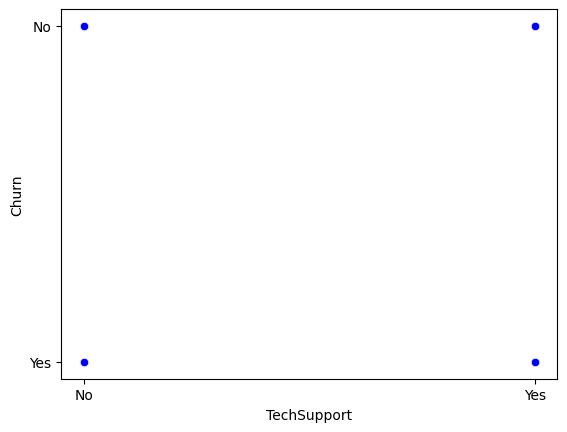

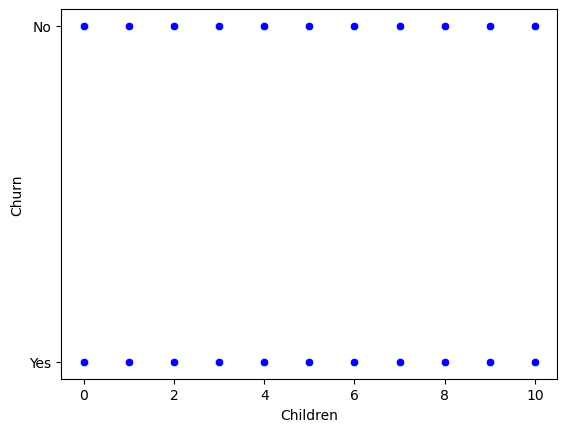

In [12]:
#create scatterplots to look for correlations
sns.scatterplot(x=df['MonthlyCharge'],y=df['Churn'],color='blue')
plt.show();
sns.scatterplot(x=df['Income'],y=df['Churn'],color='blue')
plt.show();
sns.scatterplot(x=df['Income'],y=df['MonthlyCharge'],color='blue')
plt.show();
sns.scatterplot(x=df['Children'],y=df['Age'],color='blue')
plt.show();
sns.scatterplot(x=df['TechSupport'],y=df['Age'],color='blue')
plt.show();
sns.scatterplot(x=df['TechSupport'],y=df['Churn'],color='blue')
plt.show();
sns.scatterplot(x=df['Children'],y=df['Churn'],color='blue')
plt.show();

In [13]:
#check for duplicate data in columns
df[df.duplicated()]

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8


In [14]:
# check if any cols are duplicated - Looking for False
df.columns.duplicated().any()

False

In [15]:
# check if any rows are duplicated - looking for False
df.duplicated().any()

False

In [16]:
# Lets verify columns were dropped
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [17]:
#The overview of descriptive statistics
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,8361.000000,8361.000000,8361.000000,8361.000000,8361.000000,8361.000000,8361.000000,8361.000000,8361.000000,8361.000000,8361.000000,8361.000000,8361.000000,8361.000000,8361.000000,8361.000000,8361.000000,8361.000000,8361.000000,8361.000000,8361.000000,8361.000000,8361.000000
mean,5001.186341,49157.896304,38.753370,-90.754319,9810.321851,2.091257,53.077263,30041.491375,10.014484,12.026432,0.998924,0.396842,34.495480,172.876678,3389.330827,3.494678,3.498983,3.484153,3.506279,3.496950,3.495634,3.504366,3.491090
std,2877.893180,27484.343605,5.441482,15.118413,14500.959782,2.150480,20.654923,15993.003559,2.960884,3.025434,0.989357,0.633899,26.449672,42.875436,2187.198268,1.034571,1.032269,1.034694,1.029117,1.025639,1.037231,1.030637,1.030143
min,1.000000,601.000000,17.966120,-171.688150,0.000000,0.000000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,169.399280,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2518.000000,26338.000000,35.371580,-97.048660,737.000000,0.000000,35.000000,16970.750000,8.052655,10.000000,0.000000,0.000000,7.869508,139.983000,1227.924743,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,4996.000000,48854.000000,39.393880,-87.905550,2917.000000,1.000000,53.000000,28251.230000,10.023239,12.000000,1.000000,0.000000,33.196120,169.937800,3260.745232,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000
75%,7489.000000,71744.000000,42.060710,-80.130040,13221.000000,3.000000,71.000000,42215.280000,11.950500,14.000000,2.000000,1.000000,61.479770,202.443300,5587.309027,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.000000,99929.000000,70.640660,-65.667850,111850.000000,10.000000,89.000000,64963.050000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [18]:
#rename survey columns for easier identification
df.rename(columns={'Item1':'Timely response','Item2':'Timely fixes','Item3':'Timely replacements','Item4':'Reliability','Item5':'Options','Item6':'Respectful response','Item7':'Courteous exchange','Item8':'Evidence of active listening'},inplace=True)

In [19]:
#verify columns were renamed correctly
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely response,Timely fixes,Timely replacements,Reliability,Options,Respectful response,Courteous exchange,Evidence of active listening
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [20]:
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Timely response', 'Timely fixes',
       'Timely replacements', 'Reliability', 'Options', 'Respectful response',
       'Courteous exchange', 'Evidence of active listening'],
      dtype='object')

In [21]:
# The dropping of varibales not neccessary for this data analysis
cols = ['Zip','CaseOrder','Customer_id','Marital','Gender','Churn','Multiple','OnlineSecurity','DeviceProtection',
         'TechSupport','StreamingTV','StreamingMovies','Contract','InternetService','PaymentMethod','Techie','Port_modem',
         'Phone','OnlineBackup','PaperlessBilling','Job','Interaction','UID','City','State','County','Area','TimeZone','Job',
         'Techie','Contract','Port_modem','Tablet','Timely response','Timely fixes', 'Timely replacements', 'Reliability', 'Options',
       'Respectful response', 'Courteous exchange','Evidence of active listening']

df2 = df.drop(cols, axis=1)

In [22]:
df2.columns

Index(['Lat', 'Lng', 'Population', 'Children', 'Age', 'Income',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'],
      dtype='object')

In [23]:
#Lets ensure values were changed
df2.head()

,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,56.25100,-133.37571,38,0,68,28561.99,7.978323,10,0,1,6.795513,172.455519,904.536110
1,44.32893,-84.24080,10446,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,800.982766
2,45.35589,-123.24657,3735,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,2054.706961
3,32.96687,-117.24798,13863,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,2164.579412
4,29.38012,-95.80673,11352,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,271.493436


In [24]:
print(list(df2.columns))

['Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']


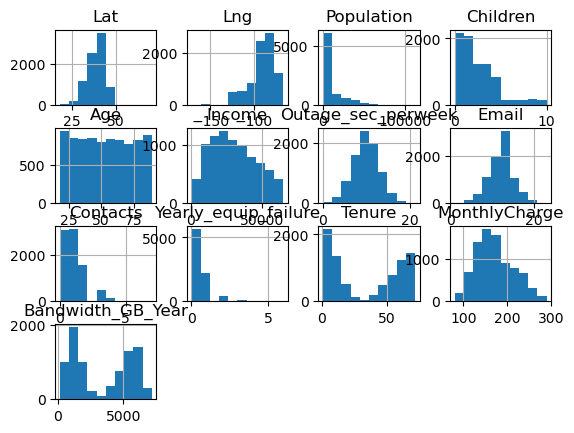

In [25]:
#create histograms of continuous variables
df2[["Lat", "Lng", "Population", "Children", "Age", "Income", "Outage_sec_perweek", "Email", 
    "Contacts", "Yearly_equip_failure", "Tenure", "MonthlyCharge", "Bandwidth_GB_Year"]].hist()
plt.savefig('Churn_plot,jpg')
plt.show()

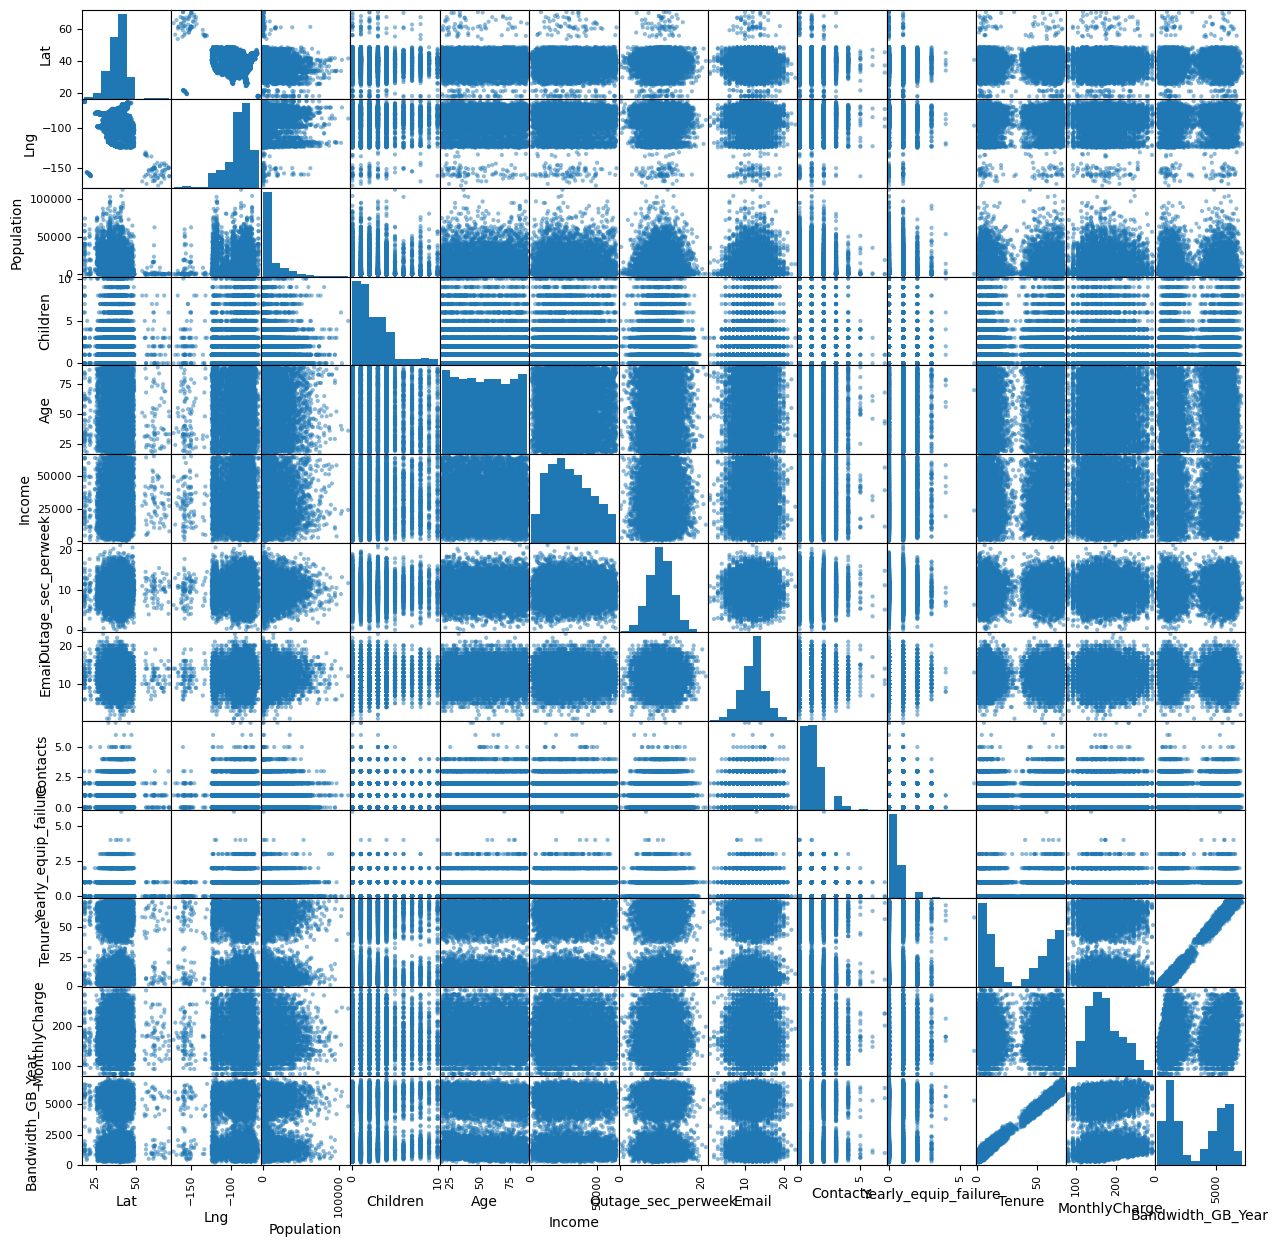

In [26]:
#lets create scatterplots for numeric variables to view distributions and look for relationships
Churn_numeric=df2[['Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']]
pd.plotting.scatter_matrix(Churn_numeric,figsize=[15,15]);

In [27]:
df2

,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,56.25100,-133.37571,38,0,68,28561.99,7.978323,10,0,1,6.795513,172.455519,904.536110
1,44.32893,-84.24080,10446,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,800.982766
2,45.35589,-123.24657,3735,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,2054.706961
3,32.96687,-117.24798,13863,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,2164.579412
4,29.38012,-95.80673,11352,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,271.493436
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,43.43391,-72.78734,640,3,23,55723.74,9.415935,12,2,0,68.197130,159.979400,6511.252601
9996,36.56907,-87.41694,77168,4,48,34129.34,6.740547,15,2,0,61.040370,207.481100,5695.951810
9997,35.52039,-100.44180,406,1,48,45983.43,6.590911,10,0,0,47.416890,169.974100,4159.305799
9998,33.58016,-85.13241,35575,1,39,16667.58,12.071910,14,1,0,71.095600,252.624000,6468.456752


In [28]:
#export prepared dataset
df2.to_csv('prepared_d212task2.csv', index = False)

In [29]:

# Principal Component Analysis (PCA) - Decomposition
df2 = pd.read_csv("prepared_d212task2.csv", index_col=1)

In [30]:
df2.head()

,Lat,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
Lng,,,,,,,,,,,,
-133.37571,56.25100,38,0,68,28561.99,7.978323,10,0,1,6.795513,172.455519,904.536110
-84.24080,44.32893,10446,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,800.982766
-123.24657,45.35589,3735,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,2054.706961
-117.24798,32.96687,13863,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,2164.579412
-95.80673,29.38012,11352,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,271.493436


In [31]:
df2.columns

Index(['Lat', 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year'],
      dtype='object')

In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 8361 entries, -133.37571 to -83.53648
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Lat                   8361 non-null   float64
 1   Population            8361 non-null   int64  
 2   Children              8361 non-null   int64  
 3   Age                   8361 non-null   int64  
 4   Income                8361 non-null   float64
 5   Outage_sec_perweek    8361 non-null   float64
 6   Email                 8361 non-null   int64  
 7   Contacts              8361 non-null   int64  
 8   Yearly_equip_failure  8361 non-null   int64  
 9   Tenure                8361 non-null   float64
 10  MonthlyCharge         8361 non-null   float64
 11  Bandwidth_GB_Year     8361 non-null   float64
dtypes: float64(6), int64(6)
memory usage: 849.2 KB


In [33]:
# Standardizing the feature matrix
X = StandardScaler().fit_transform(df2)
print(); print(X)


[[ 3.21579264 -0.67394893 -0.97251856 ... -1.04733335 -0.00982344
  -1.1361308 ]
 [ 1.02470134  0.04383959 -0.50747837 ... -1.26053709  1.62703997
  -1.18347884]
 [ 1.21344064 -0.41898504  0.88764219 ... -0.70860828 -0.30156821
  -0.61023443]
 ...
 [-0.59417151 -0.64856978 -0.50747837 ...  0.48855738 -0.06770198
   0.35205817]
 [-0.95075564  1.77686301 -0.50747837 ...  1.38384734  1.86008818
   1.4078788 ]
 [-0.74350741  0.16687329 -0.50747837 ...  1.09101939  1.04045565
   1.12856845]]


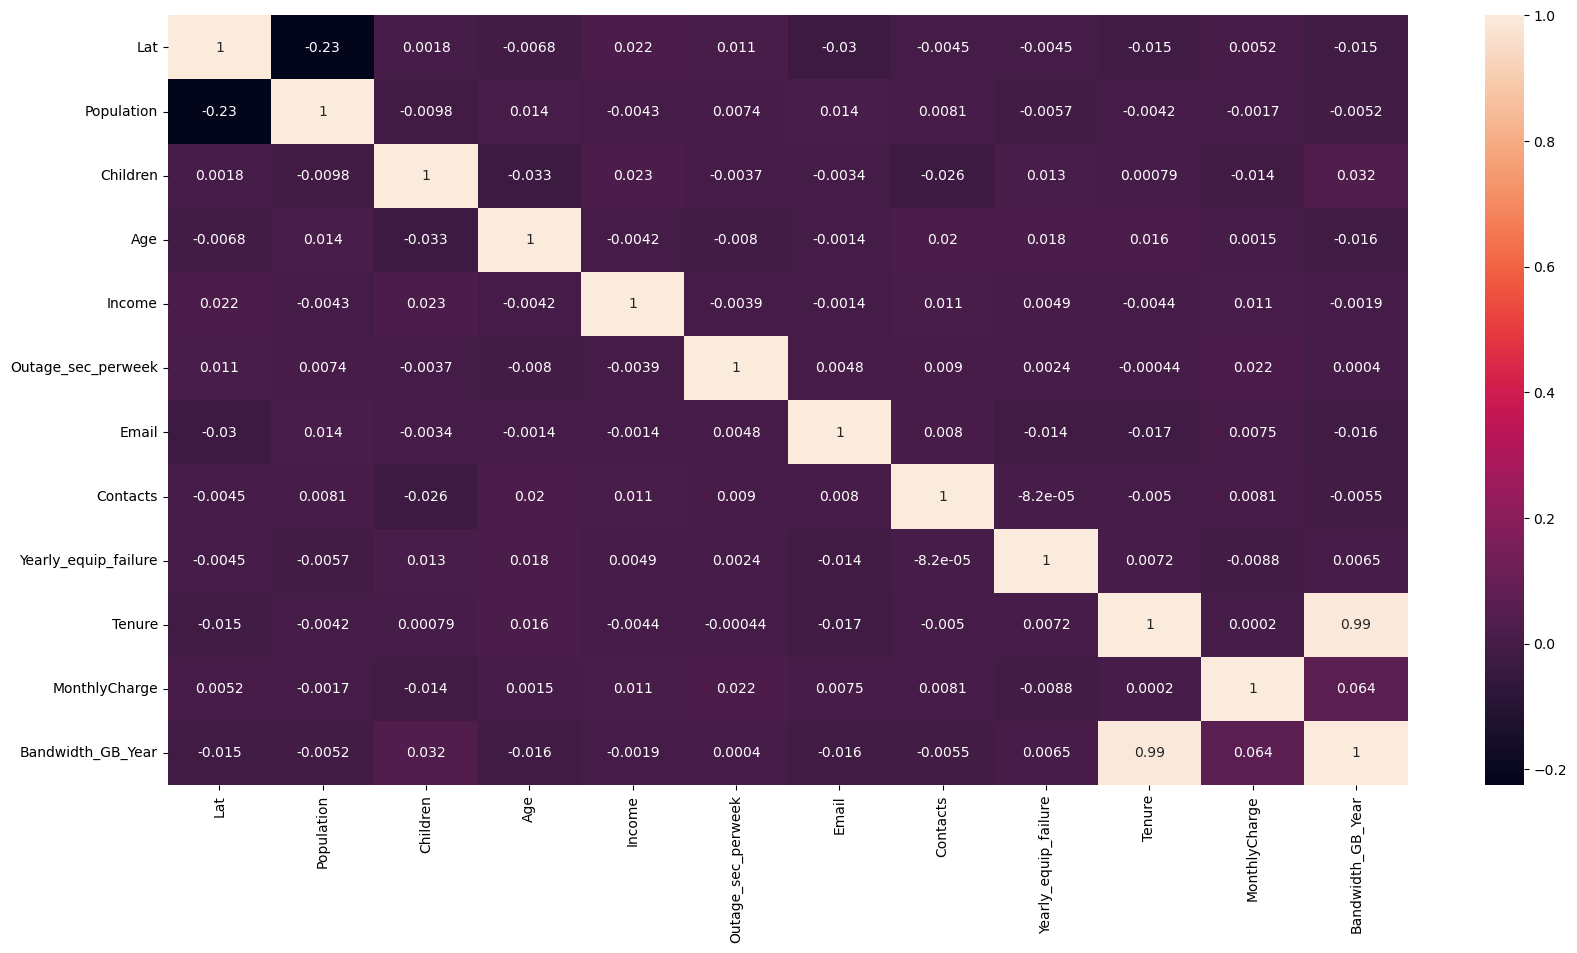

In [34]:
# Generate the correlation of the matrix for the components and a heatmap
cmatrix = df2.corr()
plt.figure(figsize=(20, 10))
sb.heatmap(cmatrix, annot=True)
plt.show()

In [35]:
df2_normalized=(df2-df2.mean())/df2.std()
df2_normalized.head()

,Lat,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
Lng,,,,,,,,,,,,
-133.37571,3.215600,-0.673909,-0.972460,0.722478,-0.092509,-0.687687,-0.669799,-1.009670,0.951505,-1.047271,-0.009823,-1.136063
-84.24080,1.024640,0.043837,-0.507448,-1.262520,-0.521273,0.568950,-0.008737,-1.009670,0.951505,-1.260462,1.626943,-1.183408
-123.24657,1.213368,-0.418960,0.887589,-0.148985,-1.277554,0.249357,-1.000330,-1.009670,0.951505,-0.708566,-0.301550,-0.610198
-117.24798,-1.063405,0.279477,-0.507448,-0.245814,-0.695070,1.654592,0.982857,1.011846,-0.626035,-0.658165,-1.234269,-0.559964
-95.80673,-1.722555,0.106316,-0.972460,1.448698,0.627318,-0.630578,1.313388,1.011846,0.951505,-1.241018,-0.534767,-1.425494


In [36]:
df2.columns

Index(['Lat', 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year'],
      dtype='object')

In [37]:
df212_pca = PCA(n_components=df2_normalized.shape[1])

In [38]:
df212_pca.fit(df2_normalized)

PCA(n_components=12)

In [39]:
df212_pca_df = pd.DataFrame(df212_pca.transform(df2_normalized),
                            columns=['Lat', 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 
                                     'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'])

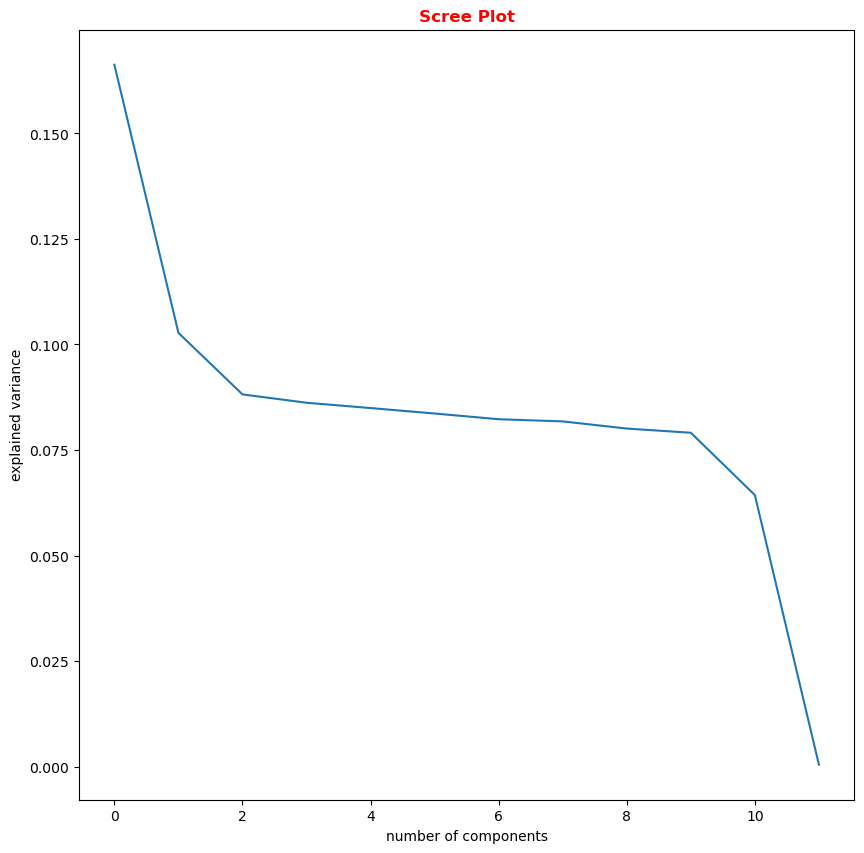

In [40]:
# Creation of Scree Plot to view  and explaine variance for components
plt.figure(figsize=(10, 10))
plt.title("Scree Plot", fontweight="bold", color='r')
plt.plot(df212_pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

In [41]:
# The Creation of Eigen Values for components
cov_matrix = np.dot(df2_normalized.T, df2_normalized) / df2.shape[0]
eigen_values = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector
in df212_pca.components_]

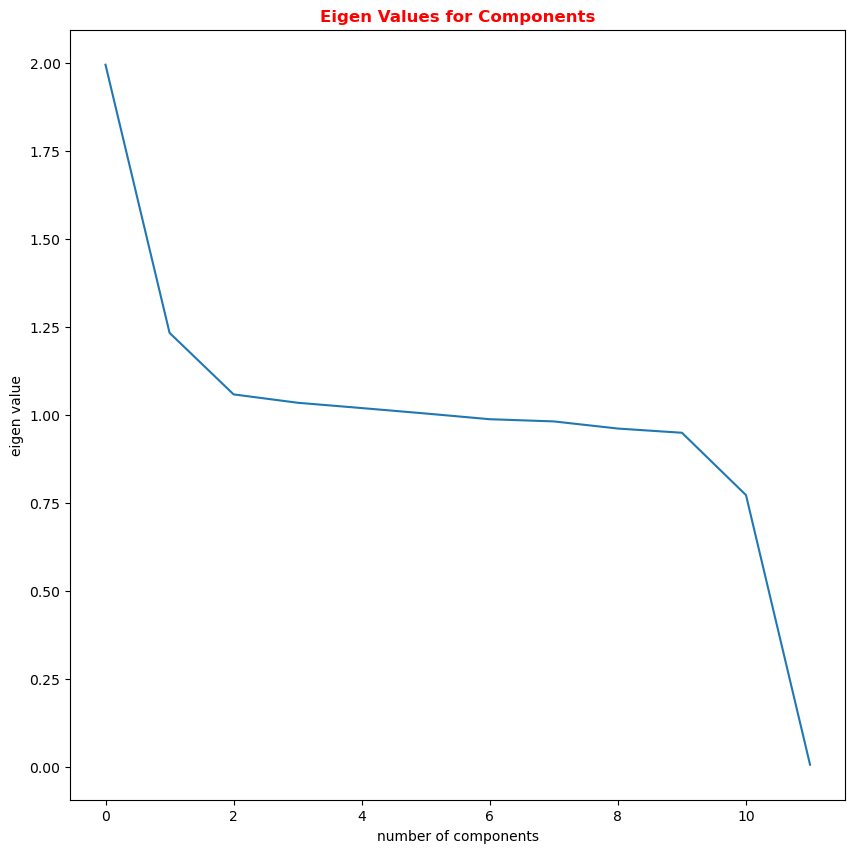

In [42]:
plt.figure(figsize=(10, 10))
plt.title("Eigen Values for Components", fontweight="bold", color='r')
plt.plot(eigen_values)
plt.xlabel('number of components')
plt.ylabel('eigen value')
plt.show()

In [ ]:
PD.dataFrame.from

In [43]:
# Create loading of the values for components

columns=['Lat', 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email',
         'Contacts', 'Yearly_equip_failure', 
                                     'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']
df212_loadings = pd.DataFrame(df212_pca.components_.T,
columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12'], index=df2.columns)
df212_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
Lat,-0.019448,-0.696351,-0.101736,-0.003018,-0.028175,0.015561,0.043212,0.006783,-0.046155,0.008162,0.706549,0.000690
Population,-0.002984,0.691292,0.060659,-0.026511,0.078767,-0.039077,-0.133968,0.029709,-0.050114,-0.020731,0.698729,0.000234
Children,0.022887,-0.061691,0.615962,-0.120325,0.296145,0.000327,0.166723,0.026690,0.020214,0.695822,0.022661,-0.021947
Age,-0.000843,0.075069,-0.463182,0.461444,0.153235,0.052863,0.074740,-0.334076,-0.476962,0.441478,-0.023457,0.021949
Income,-0.003863,-0.084920,0.106848,-0.182311,0.672883,0.435009,-0.207456,-0.038116,-0.362076,-0.356528,-0.058421,-0.000630
Outage_sec_perweek,0.000529,-0.007821,-0.194232,-0.428780,0.158403,-0.654341,0.168869,0.309991,-0.443801,-0.007549,-0.058974,0.000523
Email,-0.022962,0.132345,-0.096197,-0.359057,-0.117436,0.342278,0.800192,-0.242899,-0.030714,-0.097937,0.054715,-0.000287
Contacts,-0.007849,0.050397,-0.482065,-0.020784,0.300993,0.273776,0.083204,0.615468,0.391641,0.244783,-0.002316,-0.000309
Yearly_equip_failure,0.010067,-0.010487,0.065411,0.425363,0.511556,-0.404033,0.372875,-0.167367,0.364091,-0.297830,0.036501,-0.000042
Tenure,0.704914,-0.001830,-0.012696,0.033584,-0.022019,0.021421,0.025517,0.030985,-0.036008,-0.025805,0.011341,-0.705094


In [56]:
data_frame = pd.DataFrame(df212_pca.components_.T, columns=['Lat', 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 
                                     'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'])

In [45]:
data_frame = pd.DataFrame(data_frame, columns=['Lat', 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 
                                     'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'])
df212_loadings = pd.DataFrame(df212_pca.components_.T,
columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12'], index=df2.columns)
df212_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
Lat,-0.019448,-0.696351,-0.101736,-0.003018,-0.028175,0.015561,0.043212,0.006783,-0.046155,0.008162,0.706549,0.000690
Population,-0.002984,0.691292,0.060659,-0.026511,0.078767,-0.039077,-0.133968,0.029709,-0.050114,-0.020731,0.698729,0.000234
Children,0.022887,-0.061691,0.615962,-0.120325,0.296145,0.000327,0.166723,0.026690,0.020214,0.695822,0.022661,-0.021947
Age,-0.000843,0.075069,-0.463182,0.461444,0.153235,0.052863,0.074740,-0.334076,-0.476962,0.441478,-0.023457,0.021949
Income,-0.003863,-0.084920,0.106848,-0.182311,0.672883,0.435009,-0.207456,-0.038116,-0.362076,-0.356528,-0.058421,-0.000630
Outage_sec_perweek,0.000529,-0.007821,-0.194232,-0.428780,0.158403,-0.654341,0.168869,0.309991,-0.443801,-0.007549,-0.058974,0.000523
Email,-0.022962,0.132345,-0.096197,-0.359057,-0.117436,0.342278,0.800192,-0.242899,-0.030714,-0.097937,0.054715,-0.000287
Contacts,-0.007849,0.050397,-0.482065,-0.020784,0.300993,0.273776,0.083204,0.615468,0.391641,0.244783,-0.002316,-0.000309
Yearly_equip_failure,0.010067,-0.010487,0.065411,0.425363,0.511556,-0.404033,0.372875,-0.167367,0.364091,-0.297830,0.036501,-0.000042
Tenure,0.704914,-0.001830,-0.012696,0.033584,-0.022019,0.021421,0.025517,0.030985,-0.036008,-0.025805,0.011341,-0.705094


In [54]:
data_frame = pd.DataFrame(data_frame, columns=['Lat', 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 
                                     'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'])
df212_loadings = pd.DataFrame(df212_pca.components_.T,
columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12'], index=df2.columns)
df212_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
Lat,-0.019448,-0.696351,-0.101736,-0.003018,-0.028175,0.015561,0.043212,0.006783,-0.046155,0.008162,0.706549,0.000690
Population,-0.002984,0.691292,0.060659,-0.026511,0.078767,-0.039077,-0.133968,0.029709,-0.050114,-0.020731,0.698729,0.000234
Children,0.022887,-0.061691,0.615962,-0.120325,0.296145,0.000327,0.166723,0.026690,0.020214,0.695822,0.022661,-0.021947
Age,-0.000843,0.075069,-0.463182,0.461444,0.153235,0.052863,0.074740,-0.334076,-0.476962,0.441478,-0.023457,0.021949
Income,-0.003863,-0.084920,0.106848,-0.182311,0.672883,0.435009,-0.207456,-0.038116,-0.362076,-0.356528,-0.058421,-0.000630
Outage_sec_perweek,0.000529,-0.007821,-0.194232,-0.428780,0.158403,-0.654341,0.168869,0.309991,-0.443801,-0.007549,-0.058974,0.000523
Email,-0.022962,0.132345,-0.096197,-0.359057,-0.117436,0.342278,0.800192,-0.242899,-0.030714,-0.097937,0.054715,-0.000287
Contacts,-0.007849,0.050397,-0.482065,-0.020784,0.300993,0.273776,0.083204,0.615468,0.391641,0.244783,-0.002316,-0.000309
Yearly_equip_failure,0.010067,-0.010487,0.065411,0.425363,0.511556,-0.404033,0.372875,-0.167367,0.364091,-0.297830,0.036501,-0.000042
Tenure,0.704914,-0.001830,-0.012696,0.033584,-0.022019,0.021421,0.025517,0.030985,-0.036008,-0.025805,0.011341,-0.705094


In [51]:
# PCA projection
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents
              , columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8', 'PC9', 'PC10'])
principalDf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.592168,-2.717558,-0.549094,1.425006,-0.204500,-0.399851,-0.275200,-1.125963,-0.140406,-0.712168
1,-1.662372,-0.786085,0.063174,-1.070881,-0.098447,-1.597819,-0.198820,-1.134851,1.102104,-0.909938
2,-0.900702,-1.276814,1.029556,0.877790,-0.387027,-1.671773,0.088819,-0.196349,0.292870,0.557602
3,-0.940070,1.206098,-0.700574,-0.683878,-0.694400,-0.396168,1.219300,1.775518,-0.661473,-0.111254
4,-1.927979,1.629178,-1.269682,1.101595,0.880459,1.109964,1.225053,-0.335544,-0.051719,-0.495018


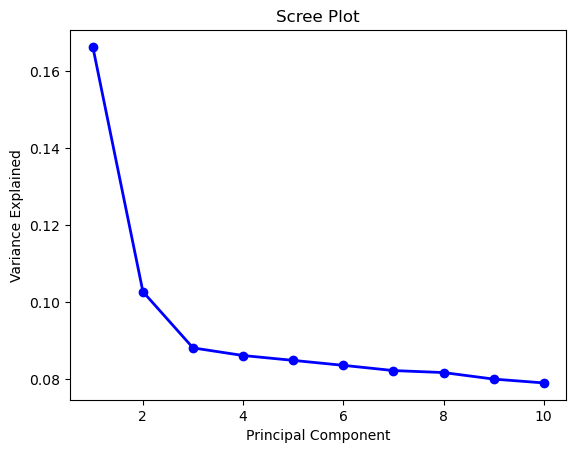

In [49]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
pca.explained_variance_ratio_ 

In [ ]:
#PCA1 = 16.63%, PCA2 = 10.28% , PCA3= 8.82%, PCA4 = 8.62%, PCA5 = 8.50%, 
PCA6 = 8.37%, PCa7 = 8.23%, PCA8 = 8.18%, PCA9 = 8.01%, PCA10 = 7.91%, 
the total variance of the PC we decide to keep = 93.55 which gives us a feasible total variance suitible for further analysis.
However,The rest of the varinaces are contained in the rest of the PCA that were being reduced becuase they contian less qunatity of varinace. 